In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

from utils import *

In [2]:
plotpath="/project/cas/islas/python_plots/CESM2_ECS_TCR/FIGS/"

### Reading in the aprp data and calculating global means

In [26]:
cesm2_2deg_aprp = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/margaret_aprp_20y/aprp_CESM2_1pctCO2_20.nc")
paleo_aprp = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/margaret_aprp_20y/aprp_PaleoCalibr_1pctCO2_20.nc")
cesm2_1deg_aprp = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/margaret_aprp_20y/aprp_CESM2_1deg_1pctCO2_20.nc")

cesm2_2deg_aprp_4x = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/margaret_aprp_20y/aprp_CESM2_4xCO2_20.nc")
paleo_aprp_4x = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/margaret_aprp_20y/aprp_PaleoCalibr_4xCO2_20.nc")
cesm2_1deg_aprp_4x = xr.open_dataset("/project/cas/islas/python_savs/CESM2issues/RAW_DATA/margaret_aprp_20y/aprp_CESM2_1deg_4xCO2_20.nc")

def get_climo(data):
    data_annual = np.mean(data.reshape(-1, 12), axis = 1)
    return data_annual

cesm2_2deg_aprp_cld = get_climo(np.array(cesm2_2deg_aprp.cld))
cesm2_2deg_aprp_cld = xr.DataArray(cesm2_2deg_aprp_cld, dims=['year'], coords=[np.arange(0,cesm2_2deg_aprp_cld.size,1)])

cesm2_2deg_aprp_delt = get_climo(np.array(cesm2_2deg_aprp.delta_T))
cesm2_2deg_aprp_delt = xr.DataArray(cesm2_2deg_aprp_delt, dims=['year'], coords=[np.arange(0,cesm2_2deg_aprp_delt.size,1)])

paleo_aprp_cld = get_climo(np.array(paleo_aprp.cld))
paleo_aprp_cld = xr.DataArray(paleo_aprp_cld, dims=['year'], coords=[np.arange(0,paleo_aprp_cld.size,1)])

paleo_aprp_delt = get_climo(np.array(paleo_aprp.delta_T))
paleo_aprp_delt = xr.DataArray(paleo_aprp_delt, dims=['year'], coords=[np.arange(0,paleo_aprp_delt.size,1)])

cesm2_1deg_aprp_cld = get_climo(np.array(cesm2_1deg_aprp.cld))
cesm2_1deg_aprp_cld = xr.DataArray(cesm2_1deg_aprp_cld, dims=['year'], coords=[np.arange(0,cesm2_1deg_aprp_cld.size,1)])

cesm2_1deg_aprp_delt = get_climo(np.array(cesm2_1deg_aprp.delta_T))
cesm2_1deg_aprp_delt = xr.DataArray(cesm2_1deg_aprp_delt, dims=['year'], coords=[np.arange(0,cesm2_1deg_aprp_delt.size,1)])


cesm2_2deg_aprp_cld_4x = get_climo(np.array(cesm2_2deg_aprp_4x.cld))
cesm2_2deg_aprp_cld_4x = xr.DataArray(cesm2_2deg_aprp_cld_4x, dims=['year'], coords=[np.arange(0,cesm2_2deg_aprp_cld_4x.size,1)])

cesm2_2deg_aprp_delt_4x = get_climo(np.array(cesm2_2deg_aprp_4x.delta_T))
cesm2_2deg_aprp_delt_4x = xr.DataArray(cesm2_2deg_aprp_delt_4x, dims=['year'], coords=[np.arange(0,cesm2_2deg_aprp_delt_4x.size,1)])

paleo_aprp_cld_4x = get_climo(np.array(paleo_aprp_4x.cld))
paleo_aprp_cld_4x = xr.DataArray(paleo_aprp_cld_4x, dims=['year'], coords=[np.arange(0,paleo_aprp_cld_4x.size,1)])

paleo_aprp_delt_4x = get_climo(np.array(paleo_aprp_4x.delta_T))
paleo_aprp_delt_4x = xr.DataArray(paleo_aprp_delt_4x, dims=['year'], coords=[np.arange(0,paleo_aprp_delt_4x.size,1)])

cesm2_1deg_aprp_cld_4x = get_climo(np.array(cesm2_1deg_aprp_4x.cld))
cesm2_1deg_aprp_cld_4x = xr.DataArray(cesm2_1deg_aprp_cld_4x, dims=['year'], coords=[np.arange(0,cesm2_1deg_aprp_cld_4x.size,1)])

cesm2_1deg_aprp_delt_4x = get_climo(np.array(cesm2_1deg_aprp_4x.delta_T))
cesm2_1deg_aprp_delt_4x = xr.DataArray(cesm2_1deg_aprp_delt_4x, dims=['year'], coords=[np.arange(0,cesm2_1deg_aprp_delt_4x.size,1)])

#cesm2_2deg_aprp = cosweightlonlat(cesm2_2deg_aprp,0,360,-90,90)
#paleo_aprp = cosweightlonlat(paleo_aprp,0,360,-90,90)
#cesm2_1deg_aprp = cosweightlonlat(cesm2_1deg_aprp,0,360,-90,90)

#cesm2_2deg_aprp_4x = cosweightlonlat(cesm2_2deg_aprp_4x,0,360,-90,90)
#paleo_aprp_4x = cosweightlonlat(paleo_aprp_4x,0,360,-90,90)
#cesm2_1deg_aprp_4x = cosweightlonlat(cesm2_1deg_aprp_4x,0,360,-90,90)

feedback_2deg = cesm2_2deg_aprp_cld / cesm2_2deg_aprp_delt
feedback_paleo = paleo_aprp_cld / paleo_aprp_delt
feedback_1deg = cesm2_1deg_aprp_cld / cesm2_1deg_aprp_delt

feedback_2deg_4x = cesm2_2deg_aprp_cld_4x / cesm2_2deg_aprp_delt_4x
feedback_paleo_4x = paleo_aprp_cld_4x / paleo_aprp_delt_4x
feedback_1deg_4x = cesm2_1deg_aprp_cld_4x / cesm2_1deg_aprp_delt_4x


In [17]:
#aprp_deltt_1deg_sm = runningmean(cesm2_1deg_aprp.delta_T,20)
#aprp_deltt_2deg_sm = runningmean(cesm2_2deg_aprp.delta_T,20)
#aprp_deltt_paleo_sm = runningmean(paleo_aprp.delta_T,20)

#aprp_cld_1deg_sm = runningmean(cesm2_1deg_aprp.cld,20)
#aprp_cld_2deg_sm = runningmean(cesm2_2deg_aprp.cld,20)
#aprp_cld_paleo_sm = runningmean(paleo_aprp.cld,20)

#feedback_2deg_sm = runningmean(feedback_2deg, 20)
#feedback_1deg_sm = runningmean(feedback_1deg, 20)
#feedback_paleo_sm = runningmean(feedback_paleo, 20)


#aprp_deltt_1deg_4x_sm = runningmean(cesm2_1deg_aprp_4x.delta_T,20)
#aprp_deltt_2deg_4x_sm = runningmean(cesm2_2deg_aprp_4x.delta_T,20)
#aprp_deltt_paleo_4x_sm = runningmean(paleo_aprp_4x.delta_T,20)

#aprp_cld_1deg_4x_sm = runningmean(cesm2_1deg_aprp_4x.cld,20)
#aprp_cld_2deg_4x_sm = runningmean(cesm2_2deg_aprp_4x.cld,20)
#aprp_cld_paleo_4x_sm = runningmean(paleo_aprp_4x.cld,20)

#feedback_2deg_4x_sm = runningmean(feedback_2deg_4x, 20)
#feedback_1deg_4x_sm = runningmean(feedback_1deg_4x, 20)
#feedback_paleo_4x_sm = runningmean(feedback_paleo_4x, 20)



### Reading in the model data

In [14]:
basepath="/project/cas/islas/python_savs/CESM2issues/DATA_SORT/globalmeans/SWCF/"
basepath_ts="/project/cas/islas/python_savs/CESM2issues/DATA_SORT/globalmeans/TS/"

### CMIP6 models

In [15]:
cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo.csv')
models = cmip6models['Model']
cmip6_trans = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    datm = dat.mean('M')
    cmip6_trans.append(datm)
cmip6_trans = xr.concat(cmip6_trans, dim='models')

cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo_1pct.csv')
models = cmip6models['Model']
cmip6_pictrl = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6_pictrl/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    cmip6_pictrl.append(dat)
cmip6_pictrl = xr.concat(cmip6_pictrl, dim='models')


cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo_1pct.csv')
models = cmip6models['Model']
cmip6_1pct = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6_1pct/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    cmip6_1pct.append(dat)
cmip6_1pct = xr.concat(cmip6_1pct, dim='models')

cmip6models = pd.read_csv('/home/islas/python/CESM2issues/DATA_SORT/globalmeans/SWCF/cmip6csvinfo_1pct.csv')
models = cmip6models['Model']
cmip6_4x = []
for imodel in models:
    dat = xr.open_dataset(basepath+"CMIP6_4x/SWCF_"+imodel+".nc").__xarray_dataarray_variable__
    cmip6_4x.append(dat)
cmip6_4x = xr.concat(cmip6_4x, dim='models')

### CESM2 1 degree

In [16]:
trans_1deg = xr.open_dataset(basepath+'SWCF_am_LENS2_first50.nc').SWCF
pct1_1deg = xr.open_dataset(basepath+'SWCF_1pct_1deg.nc').SWCF
abrupt4x_1deg = xr.open_dataset(basepath+'SWCF_abrupt4x_1deg.nc').SWCF
pictrl_1deg = xr.open_dataset(basepath+'SWCF_piControl_1deg.nc').SWCF

trans_1deg_ts = xr.open_dataset(basepath_ts+'TS_am_LENS2_first50.nc').TS
pct1_1deg_ts = xr.open_dataset(basepath_ts+'TS_1pct_1deg.nc').TS
abrupt4x_1deg_ts = xr.open_dataset(basepath_ts+'TS_abrupt4x_1deg.nc').TS
pictrl_1deg_ts = xr.open_dataset(basepath_ts+'TS_piControl_1deg.nc').TS

### CESM2 2 degree

In [17]:
trans_2deg = xr.open_dataset(basepath+'SWCF_am_2deg.nc').SWCF
pct1_2deg = xr.open_dataset(basepath+'SWCF_1pct_2deg.nc').SWCF
abrupt4x_2deg = xr.open_dataset(basepath+'SWCF_abrupt4x_2deg.nc').SWCF
pictrl_2deg = xr.open_dataset(basepath+'SWCF_piControl_2deg.nc').SWCF

trans_2deg_ts = xr.open_dataset(basepath_ts+'TS_am_2deg.nc').TS
pct1_2deg_ts = xr.open_dataset(basepath_ts+'TS_1pct_2deg.nc').TS
abrupt4x_2deg_ts = xr.open_dataset(basepath_ts+'TS_abrupt4x_2deg.nc').TS
pictrl_2deg_ts = xr.open_dataset(basepath_ts+'TS_piControl_2deg.nc').TS

### CESM2 paleocalibr

In [18]:
trans_paleo = xr.open_dataset(basepath+'SWCF_am_paleocalibr.nc').SWCF
pct1_paleo = xr.open_dataset(basepath+'SWCF_1pct_paleocalibr.nc').SWCF
abrupt4x_paleo = xr.open_dataset(basepath+'SWCF_abrupt4x_paleocalibr.nc').SWCF
pictrl_paleo = xr.open_dataset(basepath+'SWCF_picontrol_paleocalibr.nc').SWCF

trans_paleo_ts = xr.open_dataset(basepath_ts+'TS_am_paleocalibr.nc').TS
pct1_paleo_ts = xr.open_dataset(basepath_ts+'TS_1pct_paleocalibr.nc').TS
abrupt4x_paleo_ts = xr.open_dataset(basepath_ts+'TS_abrupt4x_paleocalibr.nc').TS
pictrl_paleo_ts = xr.open_dataset(basepath_ts+'TS_picontrol_paleocalibr.nc').TS

In [23]:
cesm2_1deg_aprp_delt_4x

<xarray.DataArray (year: 131)> Size: 1kB
array([3.33794824, 3.50485538, 3.63301307, 3.73128151, 3.817177  ,
       3.90627546, 3.9970928 , 4.05793581, 4.10439055, 4.16210817,
       4.21168035, 4.2432682 , 4.27803192, 4.30158817, 4.33586979,
       4.36851614, 4.3860478 , 4.40057711, 4.43324551, 4.47661253,
       4.50960844, 4.52840674, 4.54508212, 4.57440054, 4.59290203,
       4.61293256, 4.63477139, 4.6382371 , 4.64912364, 4.67717445,
       4.6976768 , 4.72577462, 4.75182464, 4.77171294, 4.78630318,
       4.80454216, 4.83239674, 4.86032   , 4.87270349, 4.88080003,
       4.89001363, 4.89940198, 4.92292399, 4.93681244, 4.95247219,
       4.98163498, 5.00060904, 5.03449076, 5.07195531, 5.08776143,
       5.10540849, 5.10800367, 5.10571991, 5.11732826, 5.13015938,
       5.14943934, 5.15393031, 5.14994539, 5.16485249, 5.18107815,
       5.1991128 , 5.21004953, 5.21222903, 5.22143514, 5.23325898,
       5.23399977, 5.23373065, 5.24838421, 5.25628622, 5.26688199,
       5.27254818, 5.28907377, 5.29730903, 5.31676898, 5.33796656,
       5.34843361, 5.37748892, 5.40532001, 5.41458375, 5.43369142,
       5.45440405, 5.48507247, 5.5147727 , 5.52978474, 5.53267349,
       5.55443621, 5.58779755, 5.61133867, 5.63040869, 5.65074962,
       5.6804013 , 5.69455967, 5.72661267, 5.73791227, 5.74986638,
       5.76852254, 5.77822987, 5.80141858, 5.82521249, 5.84691294,
       5.8621724 , 5.88113701, 5.89854931, 5.92527223, 5.96566067,
       5.98813785, 5.99130185, 6.00075723, 6.02784319, 6.03929062,
       6.04821056, 6.07617566, 6.08951241, 6.11759227, 6.13796055,
       6.1567806 , 6.17178565, 6.18008153, 6.2064212 , 6.22398439,
       6.24973862, 6.26114037, 6.28283047, 6.29290492, 6.31128233,
       6.33834534, 6.36711614, 6.39464824, 6.41185854, 6.43464956,
       6.46422286])
Coordinates:
  * year     (year) int64 1kB 0 1 2 3 4 5 6 7 ... 124 125 126 127 128 129 130

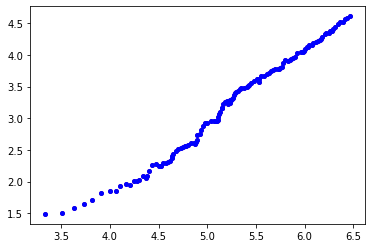

In [25]:
plt.plot(cesm2_1deg_aprp_delt_4x, cesm2_1deg_aprp_cld_4x,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
plt.plot(cesm2_2deg_aprp_delt_4x, cesm2_2deg_aprp_cld_4x,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')

### Plotting the figure

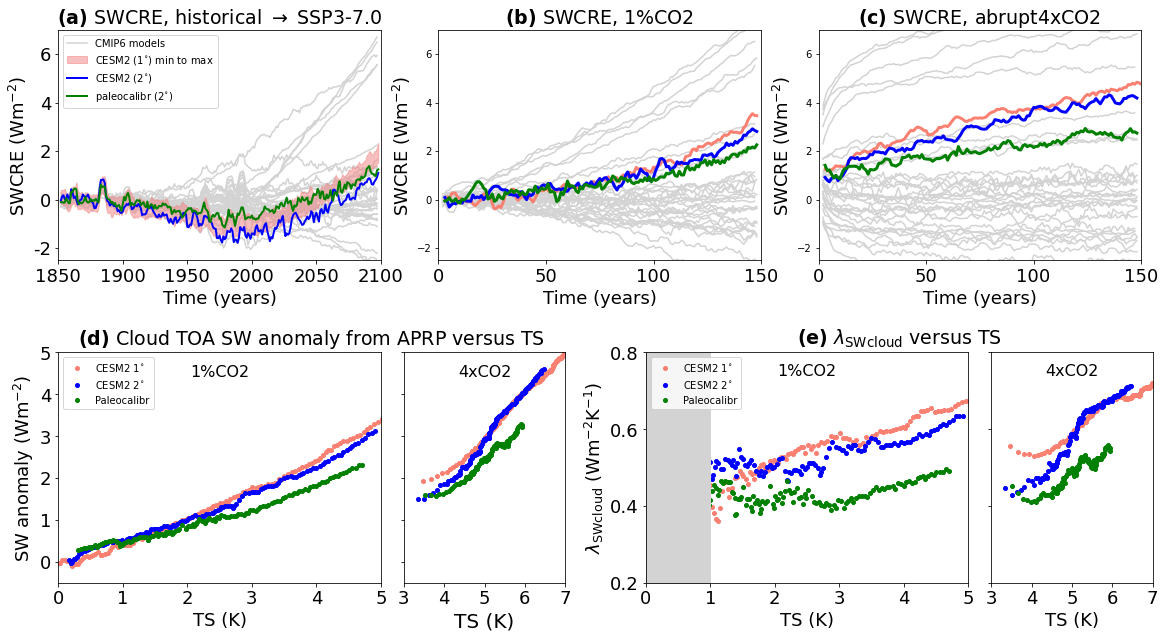

In [28]:
fig = plt.figure(figsize=(16,16))

#----------------panel (a)
ax = fig.add_axes([0.02,0.7,0.28,0.2])
ax.set_ylim(-2.5,7)
ax.set_yticks([-2,0,2,4,6])
ax.set_yticklabels(['-2','0','2','4','6'], fontsize=18)
ax.set_ylabel('SWCRE (Wm$^{-2}$)', fontsize=18)
ax.set_xticks([1850,1900,1950,2000,2050,2100])
ax.set_xticklabels(['1850','1900','1950','2000','2050','2100'], fontsize=18)
ax.set_title('$\\bf{(a)}$ SWCRE, historical $\\rightarrow$ SSP3-7.0', fontsize=19)
ax.set_xlim(1850,2100)
ax.set_xlabel('Time (years)', fontsize=18)

trans_1deg_anoms = trans_1deg - trans_1deg.sel(year=slice(1850,1900)).mean('year')
trans_2deg_anoms = trans_2deg - trans_2deg.sel(year=slice(1850,1900)).mean('year')
trans_paleo_anoms = trans_paleo - trans_paleo.sel(year=slice(1850,1900)).mean('year')
cmip6_trans_anoms = cmip6_trans - cmip6_trans.sel(year=slice(1850,1900)).mean('year')

trans_1deg_anoms = runningmean(trans_1deg_anoms, 5, timeaxis='year')
trans_2deg_anoms = runningmean(trans_2deg_anoms, 5, timeaxis='year')
trans_paleo_anoms = runningmean(trans_paleo_anoms, 5, timeaxis='year')
cmip6_trans_anoms = runningmean(cmip6_trans_anoms, 5, timeaxis='year')

for imodel in np.arange(0,cmip6_trans_anoms.models.size,1):
    ax.plot(cmip6_trans_anoms.year, cmip6_trans_anoms.isel(models=imodel), color='lightgray', zorder=0,
            label='CMIP6 models' if imodel == 0 else '')

ax.fill_between(trans_1deg_anoms.year, trans_1deg_anoms.min('M'), trans_1deg_anoms.max('M'), color='lightcoral', alpha=0.5, zorder=1,
                label='CESM2 (1$^{\circ}$) min to max')

ax.plot(trans_2deg_anoms.year, trans_2deg_anoms, color='blue', linewidth=2, zorder=2, label='CESM2 (2$^{\circ}$)')
ax.plot(trans_paleo_anoms.year, trans_paleo_anoms, color='green', linewidth=2, zorder=3, label='paleocalibr (2$^{\circ}$)')

ax.legend(loc='upper left')
#---------------------------------end panel (a)

#---------------------------------panel (b)
ax = fig.add_axes([0.35,0.7,0.28,0.2])
ax.set_ylim(-2.5,7)
ax.set_xlim(0,150)
ax.set_xticks([0,50,100,150])
ax.set_xticklabels(['0','50','100','150'], fontsize=18)
ax.set_ylabel('SWCRE (Wm$^{-2}$)', fontsize=18)
ax.set_title('$\\bf{(b)}$ SWCRE, 1%CO2', fontsize=19)
ax.set_xlabel('Time (years)', fontsize=18)

cmip6_1pct_anoms = cmip6_1pct - cmip6_pictrl.mean('year')
cmip6_1pct_anoms = runningmean(cmip6_1pct_anoms, 5, timeaxis='year')

pct1_1deg_anoms = pct1_1deg - pictrl_1deg.mean('year')
pct1_2deg_anoms = pct1_2deg - pictrl_2deg.mean('year')
pct1_paleo_anoms = pct1_paleo - pictrl_paleo.mean('year')

pct1_1deg_anoms = runningmean(pct1_1deg_anoms, 5, timeaxis='year')
pct1_2deg_anoms = runningmean(pct1_2deg_anoms, 5, timeaxis='year')
pct1_paleo_anoms = runningmean(pct1_paleo_anoms, 5, timeaxis='year')

for imodel in np.arange(0,cmip6_1pct_anoms.models.size,1):
    ax.plot(cmip6_1pct_anoms.year, cmip6_1pct_anoms.isel(models=imodel), color='lightgray', zorder=0,
            label='CMIP6 models' if imodel == 0 else '')

ax.plot(pct1_1deg_anoms.year, pct1_1deg_anoms, color='salmon', linewidth=3)
ax.plot(pct1_2deg_anoms.year, pct1_2deg_anoms, color='blue', linewidth=3)
ax.plot(pct1_paleo_anoms.year, pct1_paleo_anoms, color='green', linewidth=3)
#-----------------------------------end panel (b)

#-----------------------------------panel (c)
ax = fig.add_axes([0.68,0.7,0.28,0.2])
ax.set_ylim(-2.5,7)
ax.set_xlim(0,150)
ax.set_xticks([0,50,100,150])
ax.set_xticklabels(['0','50','100','150'], fontsize=18)
ax.set_ylabel('SWCRE (Wm$^{-2}$)', fontsize=18)
ax.set_title('$\\bf{(c)}$ SWCRE, abrupt4xCO2', fontsize=19)
ax.set_xlabel('Time (years)', fontsize=18)

cmip6_4x_anoms = cmip6_4x - cmip6_pictrl.mean('year')
cmip6_4x_anoms = runningmean(cmip6_4x_anoms, 5, timeaxis='year')

abrupt4x_1deg_anoms = abrupt4x_1deg - pictrl_1deg.mean('year')
abrupt4x_2deg_anoms = abrupt4x_2deg - pictrl_2deg.mean('year')
abrupt4x_paleo_anoms = abrupt4x_paleo - pictrl_paleo.mean('year')


abrupt4x_1deg_anoms = runningmean(abrupt4x_1deg_anoms, 5, timeaxis='year')
abrupt4x_2deg_anoms = runningmean(abrupt4x_2deg_anoms, 5, timeaxis='year')
abrupt4x_paleo_anoms = runningmean(abrupt4x_paleo_anoms, 5, timeaxis='year')


for imodel in np.arange(0,cmip6_4x_anoms.models.size,1):
    ax.plot(cmip6_4x_anoms.year, cmip6_4x_anoms.isel(models=imodel), color='lightgray', zorder=0,
            label='CMIP6 models' if imodel == 0 else '')

ax.plot(abrupt4x_1deg_anoms.year, abrupt4x_1deg_anoms, color='salmon', linewidth=3)
ax.plot(abrupt4x_2deg_anoms.year, abrupt4x_2deg_anoms, color='blue', linewidth=3)
ax.plot(abrupt4x_paleo_anoms.year, abrupt4x_paleo_anoms, color='green', linewidth=3)


#----------------------------------------panel (d)
#---1%CO2
ax = fig.add_axes([0.02,0.42,0.28,0.2])
ax.set_xlim(0,5)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['0','1','2','3','4','5'], fontsize=18)
ax.set_title(' ')
ax.set_xlabel('TS (K)', fontsize=18)
ax.set_ylabel('SW anomaly (Wm$^{-2}$)', fontsize=18)
ax.set_ylim(-0.5,5)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['0','1','2','3','4','5'], fontsize=18)

ax.plot(cesm2_1deg_aprp_delt, cesm2_1deg_aprp_cld,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp_delt, cesm2_2deg_aprp_cld,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp_delt, paleo_aprp_cld,"o", color='green', markersize=4, label='Paleocalibr')


ax.text(2.5,4.7,'1%CO2', fontsize=16, ha='center',va='top')
ax.legend(loc='upper left')

#---4xCO2
ax = fig.add_axes([0.32,0.42,0.14,0.2])
ax.set_ylim(-0.5,5)
ax.set_xlim(3,7)
ax.set_xlabel('TS (K)', fontsize=20)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels(['','','','','',''], fontsize=18)
ax.set_xticks([3,4,5,6,7])
ax.set_xticklabels(['3','4','5','6','7'], fontsize=18)

ax.plot(cesm2_1deg_aprp_delt_4x, cesm2_1deg_aprp_cld_4x,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp_delt_4x, cesm2_2deg_aprp_cld_4x,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp_delt_4x, paleo_aprp_cld_4x,"o", color='green', markersize=4, label='Paleocalibr')



#ax.plot(aprp_deltt_1deg_4x_sm, aprp_cld_1deg_4x_sm,"o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
#ax.plot(aprp_deltt_2deg_4x_sm, aprp_cld_2deg_4x_sm,"o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
#ax.plot(aprp_deltt_paleo_4x_sm, aprp_cld_paleo_4x_sm,"o", color='green', markersize=4, label='Paleocalibr')


ax.text(5,4.7,'4xCO2', fontsize=16, ha='center',va='top')

fig.text(0.24,0.627,'$\\bf{(d)}$ Cloud TOA SW anomaly from APRP versus TS', fontsize=19, ha='center')


#---------------------------------panel (e)
ax = fig.add_axes([0.53,0.42,0.28,0.2]) 
ax.set_ylim(0.2,0.8)
ax.set_yticks([0.2,0.4,0.6,0.8])
ax.set_yticklabels(['0.2','0.4','0.6','0.8'], fontsize=18)
ax.set_xlim(0,5)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['0','1','2','3','4','5'], fontsize=18)
ax.set_xlabel('TS (K)', fontsize=18)
ax.set_ylabel('$\lambda_{\mathrm{SW cloud}}$ (Wm$^{-2}$K$^{-1}$)', fontsize=18)

ax.plot(cesm2_1deg_aprp_delt, feedback_1deg, "o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp_delt, feedback_2deg, "o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp_delt, feedback_paleo, "o", color='green', markersize=4, label='Paleocalibr')

ax.fill_between([0,1],[0.2,0.2],[0.8,0.8], color='lightgray', zorder=2)

ax.legend(loc='upper left')

ax.text(2.5,0.77,'1%CO2', fontsize=16, ha='center',va='top')


ax = fig.add_axes([0.83,0.42,0.14,0.2])
ax.set_ylim(0.2,0.8)
ax.set_xlim(3,7)
ax.set_xlabel('TS (K)', fontsize=18)
ax.set_yticks([0.2,0.4,0.6,0.8])
ax.set_yticklabels([' ',' ',' ',' '], fontsize=18)
ax.set_xticks([3,4,5,6,7])
ax.set_xticklabels(['3','4','5','6','7'], fontsize=18)

ax.plot(cesm2_1deg_aprp_delt_4x, feedback_1deg_4x, "o", color='salmon', markersize=4, label='CESM2 1$^{\circ}$')
ax.plot(cesm2_2deg_aprp_delt_4x, feedback_2deg_4x, "o", color='blue', markersize=4, label='CESM2 2$^{\circ}$')
ax.plot(paleo_aprp_delt_4x, feedback_paleo_4x, "o", color='green', markersize=4, label='Paleocalibr')



ax.text(5,0.77,'4xCO2', fontsize=16, ha='center',va='top')
#sys.exit()
fig.text(0.75,0.627,'$\\bf{(e)}$ $\lambda_{\mathrm{SW cloud}}$ versus TS', fontsize=19, ha='center')

fig.savefig(plotpath+'fig3_margaret.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig3_margaret.pdf', bbox_inches='tight', facecolor='white')

In [20]:
cesm2_1deg_aprp_cld_sm

<xarray.DataArray 'cld' (time: 150)> Size: 1kB
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])
Dimensions without coordinates: time